In [1]:
import pandas as pd
import numpy as np


In [2]:
df=pd.read_csv("/kaggle/input/111-2-ntut-dl-app-hw3/IXIC.csv")
df.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
12927,2022-05-09,11923.030273,11990.610352,11574.940430,11623.250000,11623.250000,5911380000
12928,2022-05-10,11900.339844,11944.940430,11566.280273,11737.669922,11737.669922,6199090000
12929,2022-05-11,11645.570313,11844.509766,11339.179688,11364.240234,11364.240234,6120860000
12930,2022-05-12,11199.250000,11547.330078,11108.759766,11370.959961,11370.959961,6647400000
12931,2022-05-13,11555.969727,11856.709961,11510.259766,11805.000000,11805.000000,5868610000


In [3]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,12932.000000,12932.000000,12932.000000,12932.000000,12932.000000,1.293200e+04
mean,2218.795050,2233.572614,2201.563290,2218.506289,2218.506289,1.062687e+09
std,2995.823019,3016.119799,2971.579266,2995.224687,2995.224687,1.222457e+09
min,54.869999,54.869999,54.869999,54.869999,54.869999,0.000000e+00
25%,252.154999,252.215000,251.975002,252.215000,252.215000,0.000000e+00
50%,1205.614990,1216.554993,1196.565002,1206.565002,1206.565002,5.536600e+08
75%,2639.817505,2658.907532,2613.762512,2637.479981,2637.479981,1.874825e+09
max,16120.919922,16212.230469,16017.230469,16057.440430,16057.440430,1.110216e+10


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12932 entries, 0 to 12931
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       12932 non-null  object 
 1   Open       12932 non-null  float64
 2   High       12932 non-null  float64
 3   Low        12932 non-null  float64
 4   Close      12932 non-null  float64
 5   Adj Close  12932 non-null  float64
 6   Volume     12932 non-null  int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 707.3+ KB


In [5]:
df.isnull().sum()

Date         0
Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

In [6]:
corr_matrix = df.corr(numeric_only=True)
corr_matrix

,Open,High,Low,Close,Adj Close,Volume
Open,1.000000,0.999962,0.999938,0.999894,0.999894,0.856845
High,0.999962,1.000000,0.999916,0.999939,0.999939,0.857749
Low,0.999938,0.999916,1.000000,0.999948,0.999948,0.855587
Close,0.999894,0.999939,0.999948,1.000000,1.000000,0.856622
Adj Close,0.999894,0.999939,0.999948,1.000000,1.000000,0.856622
Volume,0.856845,0.857749,0.855587,0.856622,0.856622,1.000000


In [7]:
df.corr(numeric_only=True)[["Close"]].sort_values(by="Close")

,Close
Volume,0.856622
Open,0.999894
High,0.999939
Low,0.999948
Close,1.000000
Adj Close,1.000000


/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


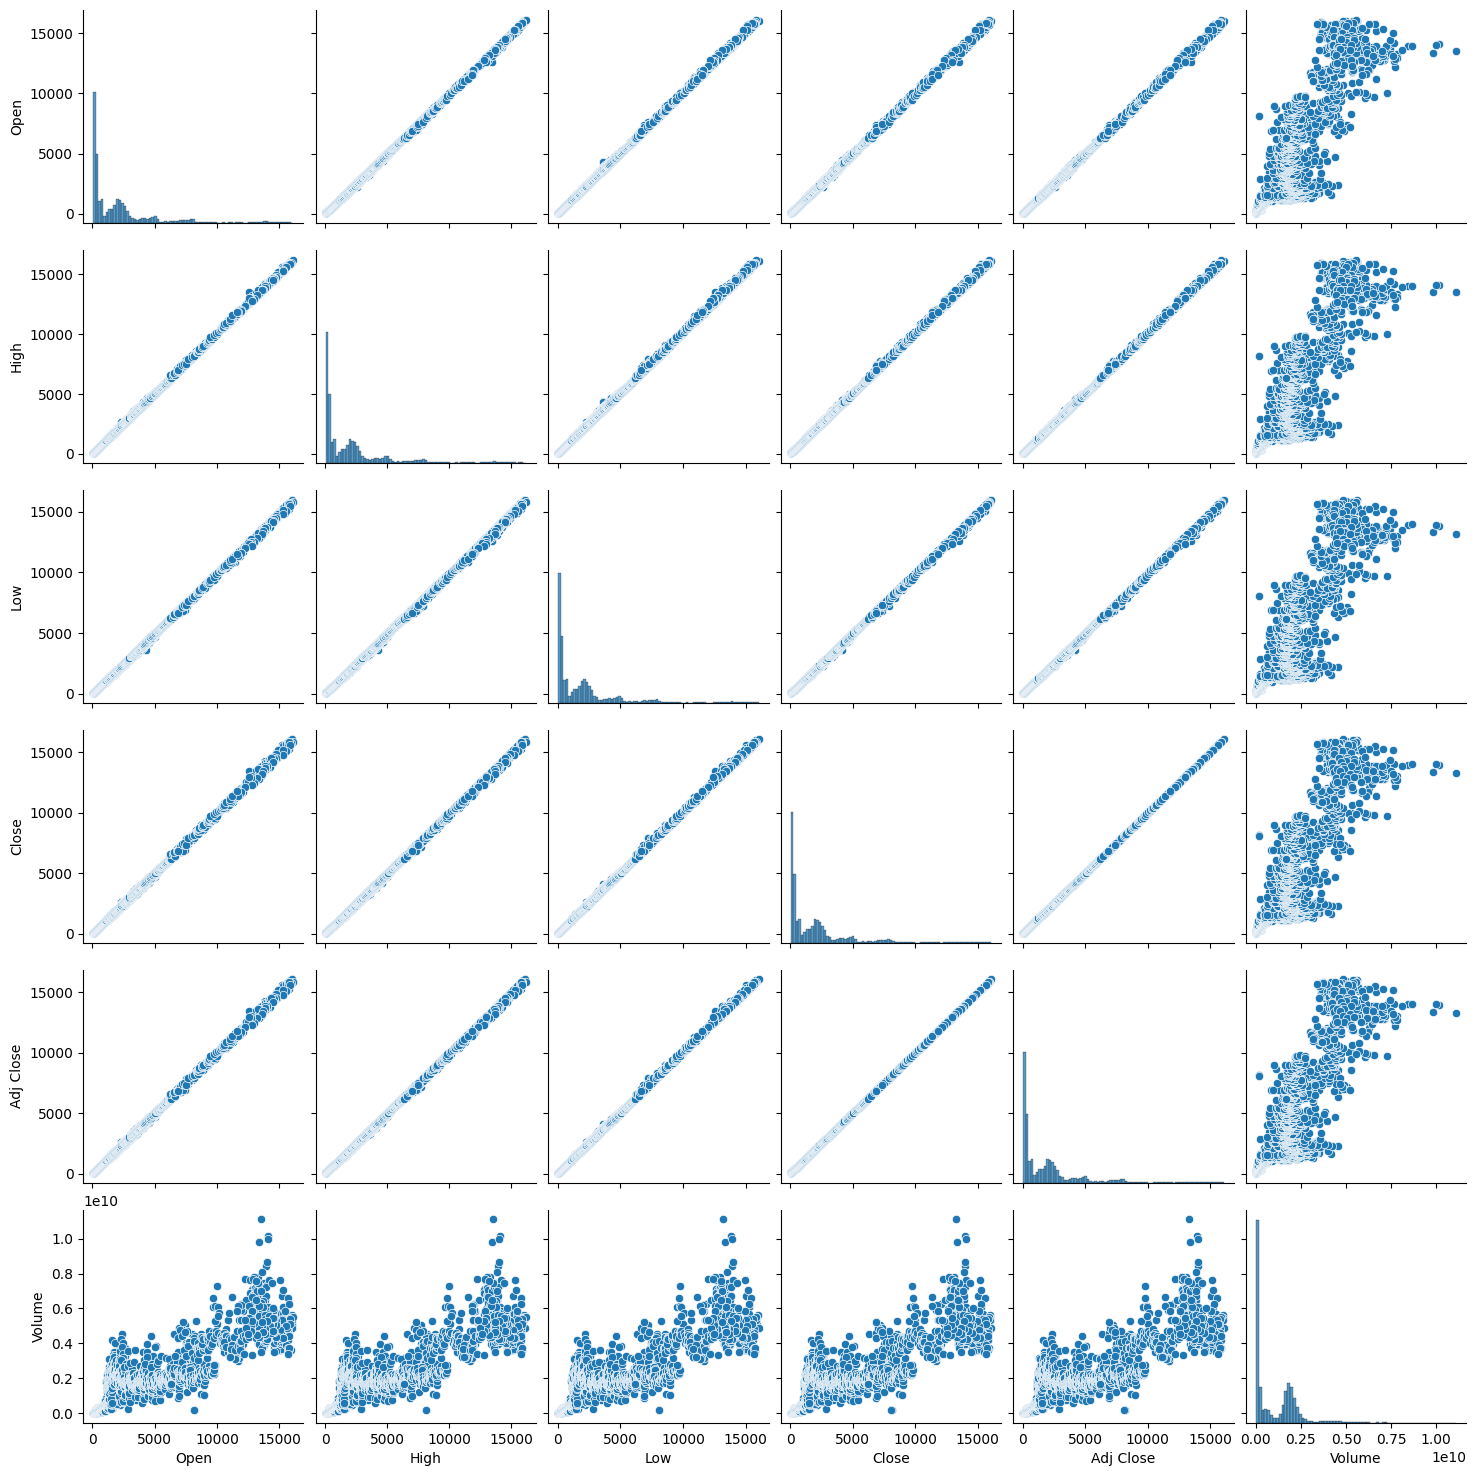

In [8]:
import seaborn as sb
sb.pairplot(df)

**LINEAR REGRESSION**

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error,r2_score

In [10]:
train, test = train_test_split(df, test_size = 0.25)

In [11]:
test_pred = test.copy()

In [12]:
x_train = train[['Open', 'High', 'Low', 'Volume']].values
x_test = test[['Open', 'High', 'Low', 'Volume']].values

In [13]:
y_train = train['Close'].values
y_test = test['Close'].values

In [14]:
model_lnr = LinearRegression()
model_lnr.fit(x_train, y_train)

LinearRegression()

In [15]:
y_pred = model_lnr.predict(x_test)

In [16]:
test_pred['Close_Prediction'] = y_pred
test_pred.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Close_Prediction
677,1973-10-12,114.099998,114.099998,114.099998,114.099998,114.099998,0,114.007033
4708,1989-09-25,467.600006,468.500000,466.200012,466.700012,466.700012,108090000,467.222462
8623,2005-04-05,1994.380005,2002.349976,1991.880005,1999.319946,1999.319946,1647510000,1999.257472
12763,2021-09-14,15168.450195,15181.190430,15008.299805,15037.759766,15037.759766,4571950000,15051.940120
7003,1998-10-22,1672.030029,1702.729980,1659.670044,1702.640015,1702.640015,894000000,1690.955304


****Model Evaluation****

In [ ]:
# prompt the user to enter values for prediction
#open_price = float(input("Enter the opening price: "))
#high_price = float(input("Enter the high price: "))
low_price = float(input("Enter the low price: "))
volume = float(input("Enter the volume: "))

# create a numpy array with the user input
user_input = np.array([[open_price, high_price, low_price, volume]])

# make the prediction
result = model_lnr.predict(user_input)

# display the result
print("The predicted close price is: ", result[0])


In [18]:
import numpy as np
from sklearn.linear_model import LinearRegression

# Assume the model_lnr has been trained and is available for use
# Assume the test_pred DataFrame contains the date, close, and close_prediction columns

# Prompt the user to enter values for prediction
date = input("Enter the future or perticuler  date (YYYY-MM-DD): ")
open_price = float(input("Enter the previous opening price: "))
high_price = float(input("Enter the previous high price: "))
low_price = float(input("Enter the previous low price: "))
volume = float(input("Enter the previous volume: "))

# Create a numpy array with the user input
user_input = np.array([[open_price, high_price, low_price, volume]])

# Make the prediction
result = model_lnr.predict(user_input)

# Display the result
print("For the date", date, "the predicted close price is:", result[0])



Enter the future or perticuler  date (YYYY-MM-DD):  2023-07-07
Enter the previous opening price:  467.600006
Enter the previous high price:  468.500000
Enter the previous low price:  466.200012
Enter the previous volume:  108090000


For the date 2023-07-07 the predicted close price is: 467.22246185370375


In [19]:
print("MSE",round(mean_squared_error(y_test,y_pred), 3))
print("RMSE",round(np.sqrt(mean_squared_error(y_test,y_pred)), 3))
print("MAE",round(mean_absolute_error(y_test,y_pred), 3))
print("MAPE",round(mean_absolute_percentage_error(y_test,y_pred), 3))
print("R2 Score : ", round(r2_score(y_test,y_pred), 3))

MSE 537.806
RMSE 23.191
MAE 8.731
MAPE 0.003
R2 Score :  1.0


Mean Squared Error (MSE): Measures the average squared difference between the predicted and actual values. A lower MSE indicates better model performance.

Root Mean Squared Error (RMSE): Square root of MSE. It is in the same unit as the target variable, making it easier to interpret. Lower RMSE indicates better model performance.

Mean Absolute Error (MAE): Measures the average absolute difference between the predicted and actual values. A lower MAE indicates better model performance.

Mean Absolute Percentage Error (MAPE): Measures the percentage difference between the predicted and actual values. A lower MAPE indicates better model performance.

R2 Score: Measures the proportion of the variance in the target variable that can be explained by the independent variables. Ranges from 0 to 1, with higher values indicating better model performance.

The round() function is used to round the metrics to 3 decimal places for better readability.